In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings

warnings.filterwarnings('ignore')


In [2]:
# read data
data = pd.read_csv("penguins_size.csv")

# select columns
kmeans = pd.DataFrame(data, columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])
kmeans.info()

# count NaN
print(kmeans.isnull().sum().sum())

# print head
kmeans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
dtypes: float64(4)
memory usage: 10.9 KB
8


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


In [3]:
# delete NaN's
kmeans = kmeans.dropna()

# count NaN again
print(kmeans.isnull().sum().sum())

# print head
kmeans.head()

0


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [4]:
# normalize the data

# copy the data 
df_min_max_scaled = kmeans.copy() 
  
# apply normalization techniques 
for column in df_min_max_scaled.columns: 
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())     

# view normalized data
print(df_min_max_scaled)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0            0.254545         0.666667           0.152542     0.291667
1            0.269091         0.511905           0.237288     0.305556
2            0.298182         0.583333           0.389831     0.152778
4            0.167273         0.738095           0.355932     0.208333
5            0.261818         0.892857           0.305085     0.263889
..                ...              ...                ...          ...
338          0.549091         0.071429           0.711864     0.618056
340          0.534545         0.142857           0.728814     0.597222
341          0.665455         0.309524           0.847458     0.847222
342          0.476364         0.202381           0.677966     0.694444
343          0.647273         0.357143           0.694915     0.750000

[342 rows x 4 columns]


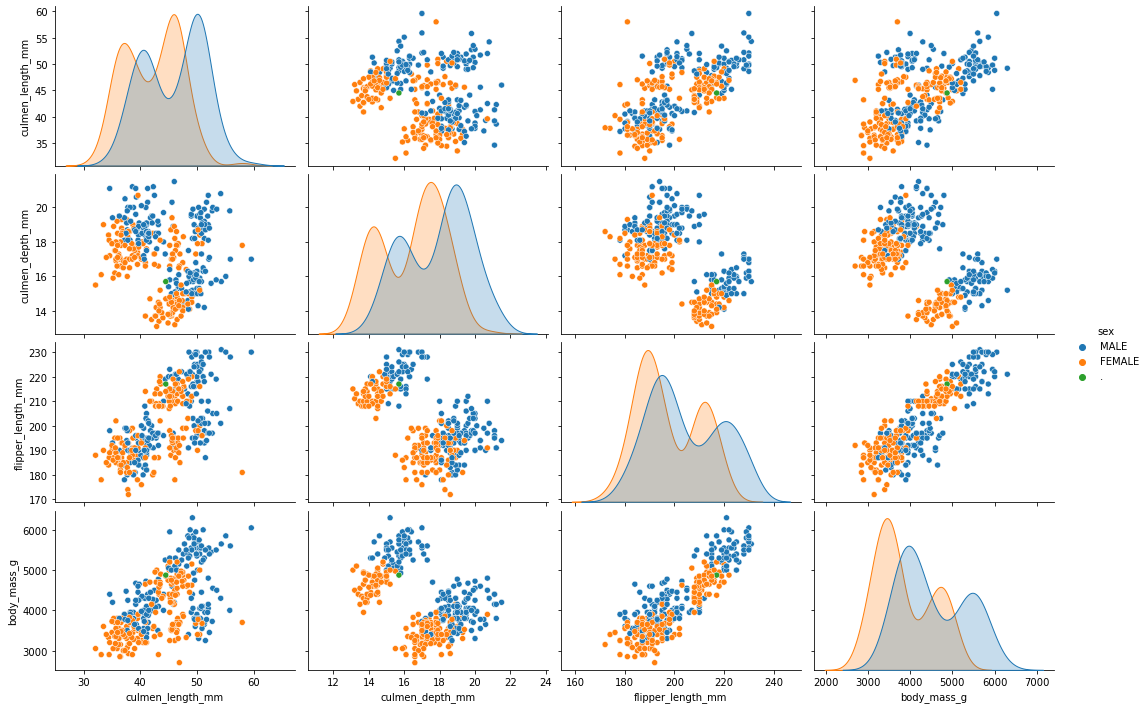

In [5]:
# Let's see our data in a detailed way with pairplot
sns.pairplot(data, hue='sex', aspect=1.5)
plt.show()

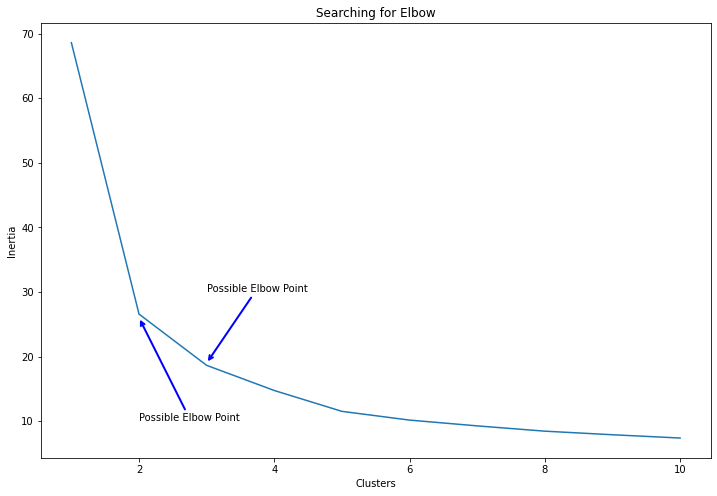

In [6]:
X = df_min_max_scaled
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(2, 26), xytext=(2, 10), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(3, 19), xytext=(3, 30), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()


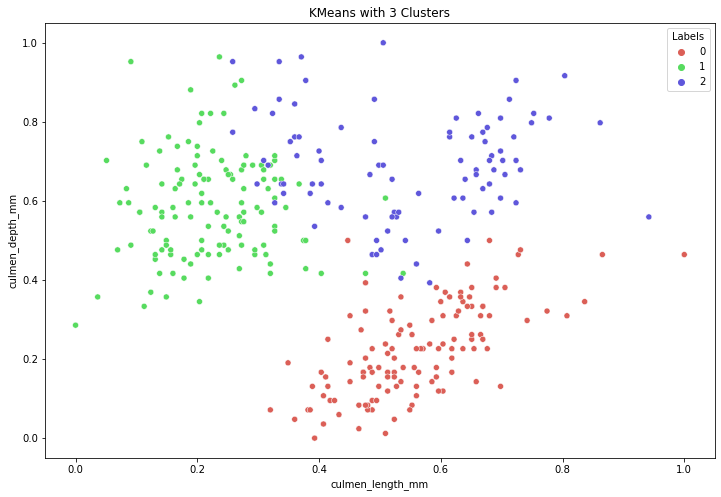

In [7]:
# 3 cluster
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['culmen_length_mm'], X['culmen_depth_mm'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

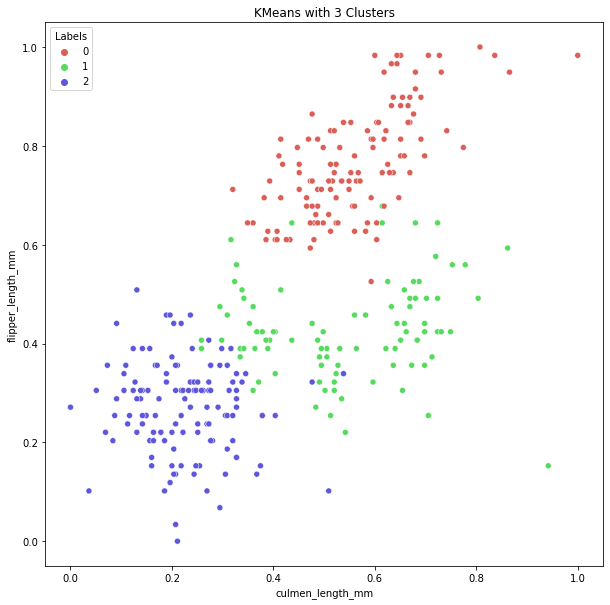

In [8]:
# 3 cluster
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(10, 10))
sns.scatterplot(X['culmen_length_mm'], X['flipper_length_mm'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

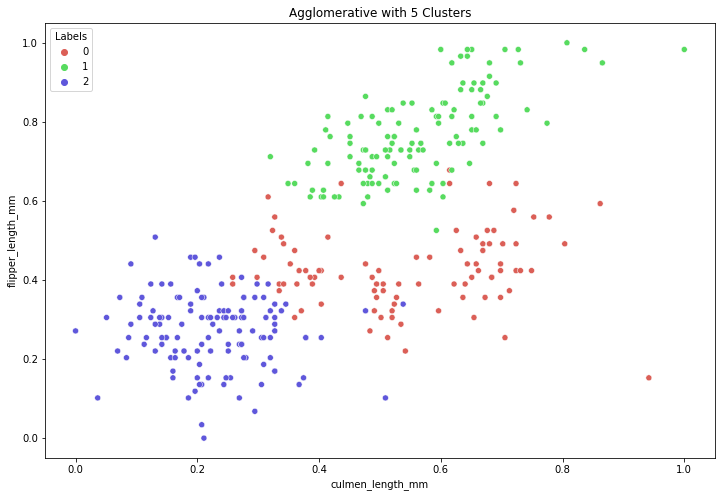

In [9]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['culmen_length_mm'], X['flipper_length_mm'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('Agglomerative with 5 Clusters')
plt.show()

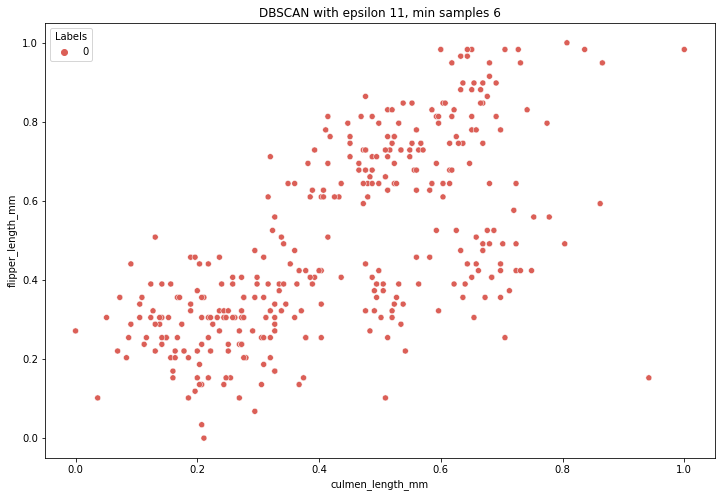

In [10]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=6, min_samples=4).fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['culmen_length_mm'], X['flipper_length_mm'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

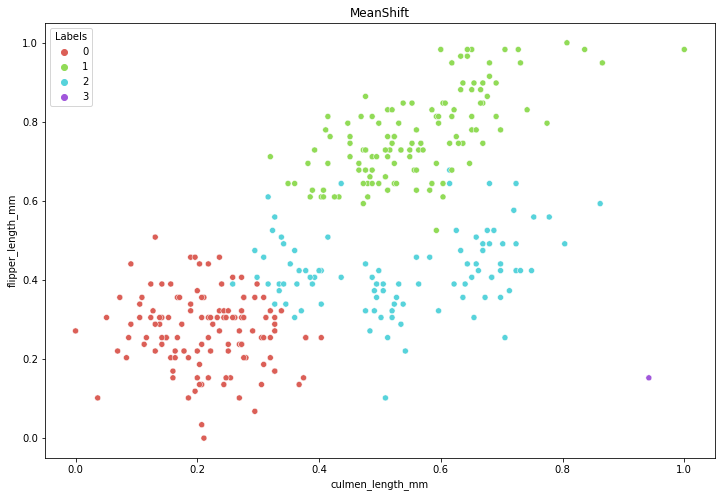

In [11]:

from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth).fit(X)

X['Labels'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['culmen_length_mm'], X['flipper_length_mm'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

In [12]:
from sklearn.mixture import GaussianMixture
from sklearn import metrics
# select columns
em = pd.DataFrame(data, columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])
em = em.dropna()

# normalize the data

# apply normalization techniques 
for column in em.columns: 
    em[column] = (em[column] - em[column].min()) / (em[column].max() - em[column].min())     

em.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
dtypes: float64(4)
memory usage: 13.4 KB


In [13]:
gmm = GaussianMixture(n_components = 3)
gmm.fit(em)

GaussianMixture(n_components=3)

In [14]:
labels = gmm.predict(em)
frame = pd.DataFrame(em)
frame['cluster'] = labels

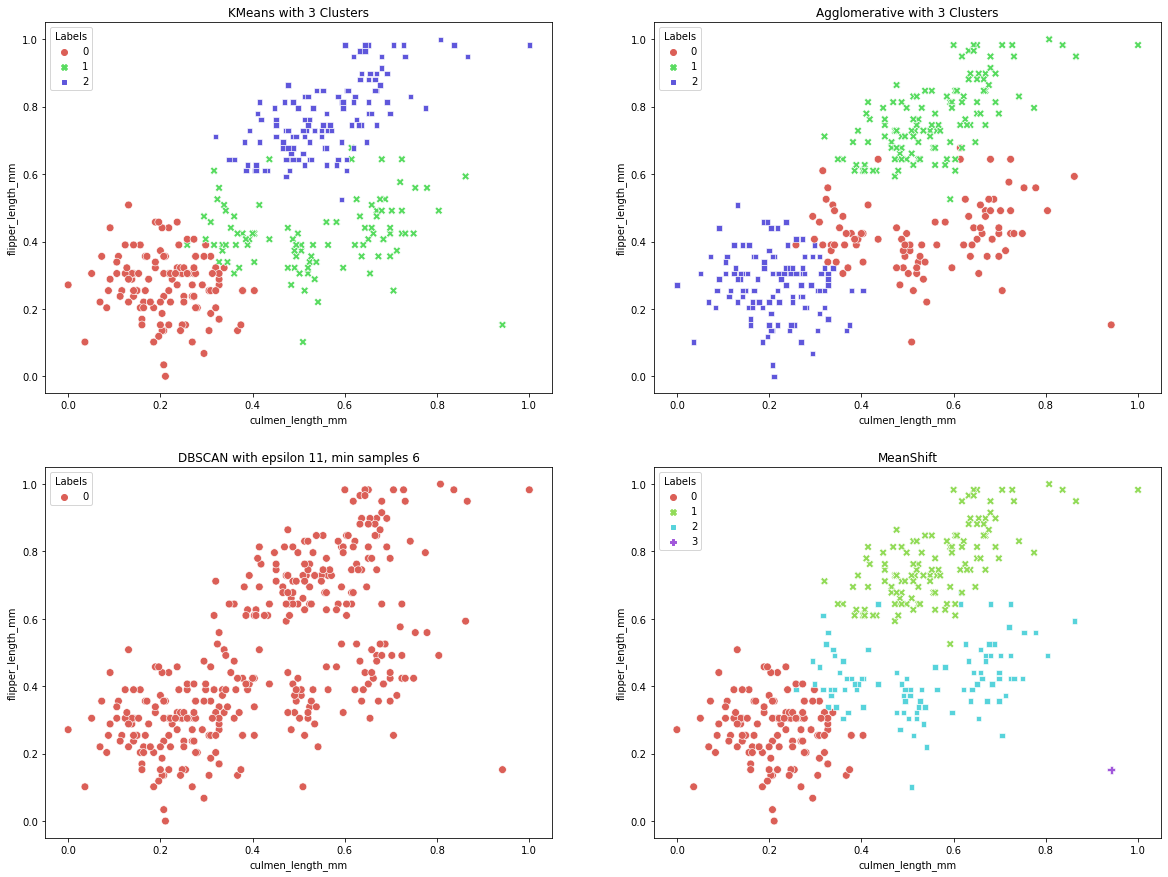

<Figure size 720x720 with 0 Axes>

<Figure size 864x576 with 0 Axes>

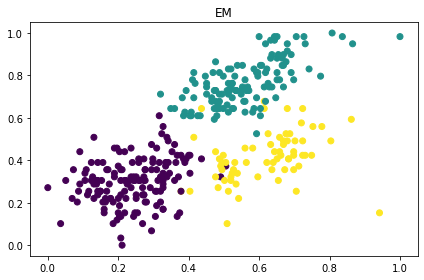

In [15]:
fig = plt.figure(figsize=(20,15))

##### KMeans #####
ax = fig.add_subplot(221)

km3 = KMeans(n_clusters=3).fit(X)
X['Labels'] = km3.labels_
plt.figure(figsize=(10, 10))
sns.scatterplot(X['culmen_length_mm'], X['flipper_length_mm'], hue=X['Labels'], style=X['Labels'], 
                palette=sns.color_palette('hls', 3),s=60, ax=ax)
ax.set_title('KMeans with 3 Clusters')



##### Agglomerative Clustering #####
ax = fig.add_subplot(222)

agglom = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['culmen_length_mm'], X['flipper_length_mm'], hue=X['Labels'], style=X['Labels'], 
                palette=sns.color_palette('hls', 3), s=60, ax=ax)
ax.set_title('Agglomerative with 3 Clusters')

##### DBSCAN #####
ax = fig.add_subplot(223)


db = DBSCAN(eps=6, min_samples=4).fit(X)

X['Labels'] = db.labels_
sns.scatterplot(X['culmen_length_mm'], X['flipper_length_mm'], hue=X['Labels'], style=X['Labels'], s=60, 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]),ax=ax)
ax.set_title('DBSCAN with epsilon 11, min samples 6')


##### MEAN SHIFT #####
ax = fig.add_subplot(224)



bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth).fit(X)
X['Labels'] = ms.labels_
sns.scatterplot(X['culmen_length_mm'], X['flipper_length_mm'], hue=X['Labels'], style=X['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]), ax=ax)
ax.set_title('MeanShift')
##### EM #####
figure, axis = plt.subplots(1,1)


axis.scatter(frame['culmen_length_mm'], frame['flipper_length_mm'], c = frame['cluster']) 
axis.set_title("EM")

plt.tight_layout()
plt.show()


  
# Combine all the operations and display
plt.show() 